# Artificial Intelligence generated views on the Black-Litterman model

## Import rquired packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Graph Formatting

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14; MEDIUM_SIZE = 16; BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(10,6))         # size fo the graph

## Import the data

Categories construction: Assigns each NYSE, AMEX, and NASDAQ stock to an industry portfolio at the end of June of year t based on its four-digit SIC code at that time. (Uses Compustat SIC codes for the fiscal year ending in calendar year t-1. Whenever Compustat SIC codes are not available, uses CRSP SIC codes for June of year t.) Then computes returns from July of t to June of t+1
 
 1. NoDur  Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys
 2. Durbl  Consumer Durables -- Cars, TVs, Furniture, Household Appliances
 3. Manuf  Manufacturing -- Machinery, Trucks, Planes, Chemicals, Off Furn, Paper, Com Printing
 4. Enrgy  Oil, Gas, and Coal Extraction and Products
 5. HiTec  Business Equipment -- Computers, Software, and Electronic Equipment
 6. Telcm  Telephone and Television Transmission
 7. Shops  Wholesale, Retail, and Some Services (Laundries, Repair Shops)
 8. Hlth   Healthcare, Medical Equipment, and Drugs
 9. Utils  Utilities
 10. Other -- Other Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment, Finance

Source: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_10_ind_port.html

In [3]:
raw_rets = pd.read_excel("10_Industry_Portfolios.xls", header=0, \
                       index_col=0, na_values=-99.99, sheet_name=0)/100

raw_rets.index = pd.to_datetime(raw_rets.index, format="%Y%m").to_period('M')
raw_rets.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1926-07,0.0145,0.1555,0.0469,-0.0118,0.0290,0.0083,0.0011,0.0177,0.0704,0.0216
1926-08,0.0397,0.0368,0.0281,0.0347,0.0266,0.0217,-0.0071,0.0425,-0.0169,0.0438
1926-09,0.0114,0.0480,0.0115,-0.0339,-0.0038,0.0241,0.0021,0.0069,0.0204,0.0029
1926-10,-0.0124,-0.0823,-0.0363,-0.0078,-0.0458,-0.0011,-0.0229,-0.0057,-0.0263,-0.0285
1926-11,0.0520,-0.0019,0.0410,0.0001,0.0471,0.0163,0.0643,0.0542,0.0371,0.0211


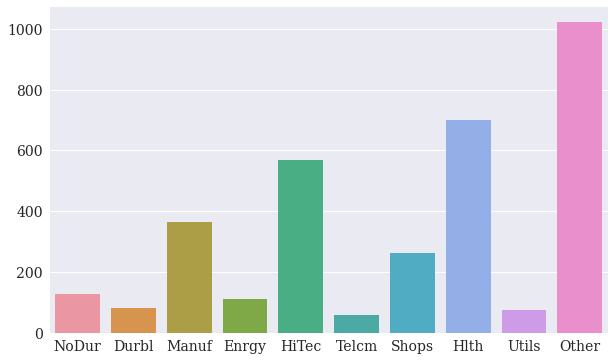

In [4]:
nfirms = pd.read_excel("10_Industry_Portfolios.xls", header=0, \
                       index_col=0, na_values=-99.99, sheet_name=1)

nfirms.index = pd.to_datetime(nfirms.index, format="%Y%m").to_period('M')

ax = sns.barplot( data=nfirms.tail(1))

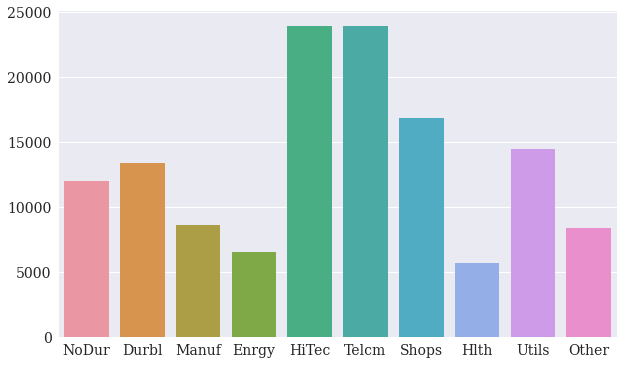

In [5]:
raw_firms_size = pd.read_excel("10_Industry_Portfolios.xls", header=0, \
                       index_col=0, na_values=-99.99, sheet_name=2)

raw_firms_size.index = pd.to_datetime(raw_firms_size.index, format="%Y%m").to_period('M')
ax = sns.barplot( data=raw_firms_size.tail(1))

In [6]:
split = int(len(raw_rets) * 0.9)
train = raw_rets.iloc[:split].copy()
test = raw_rets.iloc[split:].copy()

In [7]:
train.tail()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
2011-04,0.0459,0.0222,0.0299,0.0130,0.0311,0.0341,0.0453,0.0638,0.0399,0.0111
2011-05,0.0193,-0.0354,-0.0215,-0.0456,-0.0166,0.0077,0.0083,0.0197,0.0130,-0.0239
2011-06,-0.0101,-0.0123,-0.0059,-0.0249,-0.0233,-0.0124,-0.0089,-0.0183,-0.0034,-0.0206
2011-07,-0.0043,-0.0891,-0.0470,0.0051,-0.0037,-0.0503,-0.0067,-0.0365,-0.0035,-0.0376
2011-08,-0.0068,-0.1200,-0.0609,-0.1011,-0.0689,-0.0545,-0.0288,-0.0310,0.0014,-0.0761


## Explore the data

In [8]:
train.describe()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.009713,0.010794,0.010155,0.010631,0.010799,0.008327,0.009902,0.010616,0.008805,0.008794
std,0.046867,0.078084,0.063800,0.061173,0.074262,0.046643,0.059612,0.056860,0.056538,0.065589
min,-0.246900,-0.348000,-0.298200,-0.298400,-0.338700,-0.215600,-0.302400,-0.340800,-0.330500,-0.300300
25%,-0.014000,-0.027775,-0.020900,-0.023700,-0.028075,-0.013850,-0.021500,-0.019875,-0.016875,-0.021975
50%,0.010950,0.010050,0.013800,0.008900,0.012600,0.009000,0.011150,0.010850,0.010500,0.012450
75%,0.036700,0.048400,0.043275,0.046175,0.050675,0.032075,0.041325,0.040850,0.036275,0.042500
max,0.341700,0.797900,0.572000,0.389900,0.534900,0.281700,0.424500,0.371300,0.434600,0.587500


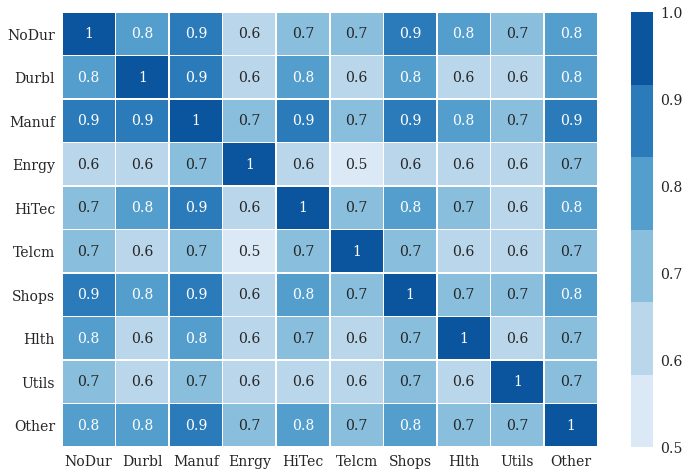

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train.corr().round(1), cmap=sns.color_palette('Blues'), annot=True, linewidths=.5, ax=ax);

In [10]:
# Calculate Mkt Cap

ind_mktcap = pd.DataFrame(nfirms * raw_firms_size)

ind_mktcap.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1926-07,2842.2,1962.85,4888.23,4314.09,1615.50,1751.80,1606.79,178.64,1705.62,5793.09
1926-08,2880.0,2258.85,5101.59,4257.99,1661.40,1766.35,1604.33,180.60,1823.01,5901.87
1926-09,2986.2,2328.78,5227.32,4313.50,1700.82,1804.80,1589.16,187.11,1785.21,6138.30
1926-10,2998.8,2432.75,5256.53,4147.00,1680.84,1820.80,1589.57,188.09,1814.61,6128.31
1926-11,2954.7,2226.66,5050.79,4109.50,1602.90,1818.70,1549.39,185.78,1762.32,5937.39


In [11]:
total_mktcap = ind_mktcap.sum(axis=1)
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
w = ind_capweight.tail(1)

## Basic Calculations

In [12]:
# Initial Weights
ind = len(train.columns)
eq_w = ind * [1 / ind]

#Risk Free
rf = 0.01

def calculate_return(weights):
    return np.dot(train.mean(), weights) * 12

def calculate_std_dev(weights):
    return math.sqrt(np.dot(weights, np.dot(train.cov(), weights)) * 12)

def calculate_sharpe(weights):
    return (calculate_return(weights) - rf) / calculate_std_dev(weights)

In [13]:
calculate_return(eq_w)

0.11824320939334637

In [14]:
calculate_std_dev(eq_w)

0.1832596455608185

In [15]:
calculate_sharpe(eq_w)

0.5906549096616234

Recall that the first step in the Black Litterman procedure was to reverse engineer the implied returns vector $\pi$ from a set of portfolio weights $w$. 

$$\pi = \delta\Sigma w$$

This is performed by the following code:

In [16]:
delta = 3
sigma = train.cov() * 12

In [17]:
eq_return = pd.DataFrame(delta * np.dot(sigma,w.T), index=nfirms.columns,columns=["eq_return"])
eq_return

,eq_return
NoDur,0.087800
Durbl,0.143316
Manuf,0.129841
Enrgy,0.092826
HiTec,0.151176
Telcm,0.075318
Shops,0.114611
Hlth,0.100177
Utils,0.089420
Other,0.130765


### The Black Litterman Formulas

Assume that we have $N$ assets, and $K$ views. There are two sets of inputs to the procedure. The first set of inputs relate to market parameters and these are:

\begin{array}{ll}
w & \mbox{A Column Vector ($N \times 1$) of Equilibrium Market Weights of the Assets} \\
\Sigma & \mbox{A Covariance Matrix ($N \times N$) of the Assets} \\
R_f & \mbox{The Risk Free Rate} \\
\delta & \mbox{The investor's Risk Aversion parameter}  \\
\tau & \mbox{A scalar indicating the uncertainty of the prior (details below)}
\end{array}

In [18]:
# Number of Assets
noa = train.shape[1]
noa

10

In [19]:
mu = train.mean() * 12
mu

NoDur    0.116550
Durbl    0.129532
Manuf    0.121855
Enrgy    0.127571
HiTec    0.129591
Telcm    0.099923
Shops    0.118825
Hlth     0.127390
Utils    0.105662
Other    0.105533
dtype: float64

In [20]:
cov = train.cov() * 12
cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.026358,0.032951,0.030626,0.021631,0.030926,0.017780,0.029174,0.025720,0.022601,0.031289
Durbl,0.032951,0.073165,0.052229,0.035517,0.054146,0.027761,0.044814,0.034021,0.033261,0.049556
Manuf,0.030626,0.052229,0.048846,0.034527,0.049147,0.024513,0.038823,0.033099,0.030505,0.045582
Enrgy,0.021631,0.035517,0.034527,0.044906,0.033889,0.017606,0.026046,0.023832,0.026032,0.033554
HiTec,0.030926,0.054146,0.049147,0.033889,0.066179,0.028541,0.042206,0.036625,0.031587,0.046843
Telcm,0.017780,0.027761,0.024513,0.017606,0.028541,0.026107,0.022677,0.019218,0.020160,0.025922
Shops,0.029174,0.044814,0.038823,0.026046,0.042206,0.022677,0.042642,0.030259,0.026617,0.038874
Hlth,0.025720,0.034021,0.033099,0.023832,0.036625,0.019218,0.030259,0.038797,0.024206,0.033121
Utils,0.022601,0.033261,0.030505,0.026032,0.031587,0.020160,0.026617,0.024206,0.038359,0.032699
Other,0.031289,0.049556,0.045582,0.033554,0.046843,0.025922,0.038874,0.033121,0.032699,0.051623


In [21]:
mu = train.shape[1]
mu

10

The second set of inputs that the procedure needs is a representation of the investors views. These are specified via:

\begin{array}{ll}
Q & \mbox{An $K \times 1$ ``Qualitative Views'' or simply, Views matrix} \\
P & \mbox{A $K \times N$ ``Projection'' or ``Pick'' matrix, linking each view to the assets} \\
\Omega & \mbox{A Covariance matrix representing the uncertainty of views}
\end{array}

### Views

#### Basics

In [22]:
v = 1  # number of views

In [23]:
P = pd.DataFrame(np.zeros((v, noa)), columns=train.columns)
P

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
q = np.zeros(v)

In [25]:
omega = np.zeros((v, v))

#### Specific View

In [26]:
P.loc[0, 'NoDur'] = 1

In [27]:
P.loc[0, 'Manuf'] = -1

In [28]:
q[0] = 0.02

In [29]:
omega[0, 0] = 0.000001  # "no" variance

In [30]:
P

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tau = 1

In [32]:
C = tau * cov

### Calculations

In [33]:
m1 = np.dot(P.T, np.dot(1 / omega, P)) + np.linalg.inv(C)

In [34]:
m1

array([[ 1.00025732e+06,  9.58260047e+00, -1.00005455e+06,
         3.86711579e+00,  2.93059448e+01, -1.12893770e+01,
        -8.38842245e+01, -5.28825946e+01, -1.92254763e+01,
        -3.11600360e+01],
       [ 9.58260047e+00,  6.35747518e+01, -5.71693379e+01,
         3.21498016e+00, -2.65185643e+00, -3.57647720e+00,
        -2.18852689e+01,  9.51661129e+00, -2.05673899e+00,
        -2.56747082e+00],
       [-1.00005455e+06, -5.71693379e+01,  1.00026362e+06,
        -3.73448935e+01, -5.22309141e+01,  1.20088690e+01,
        -4.12822080e+00, -1.02323853e+01,  5.85247573e+00,
        -7.32286086e+01],
       [ 3.86711579e+00,  3.21498016e+00, -3.73448935e+01,
         5.27578157e+01,  1.86115850e+00,  1.76690616e+00,
         7.05031510e+00, -1.08835443e+00, -1.29564015e+01,
        -5.72677963e+00],
       [ 2.93059448e+01, -2.65185643e+00, -5.22309141e+01,
         1.86115850e+00,  7.08551868e+01, -1.72120833e+01,
        -1.97953016e+01, -1.60670754e+01,  1.11990395e+00,
        -1.

In [36]:
mu = eq_return

In [37]:
m2 = np.dot(P.T, np.dot(1 / omega, q)) + np.dot(np.linalg.inv(C), mu)

In [38]:
m2

array([[ 2.00001170e+04,  1.17045452e-01, -1.99998830e+04,
         1.17045452e-01,  1.17045452e-01,  1.17045452e-01,
         1.17045452e-01,  1.17045452e-01,  1.17045452e-01,
         1.17045452e-01],
       [ 2.00000833e+04,  8.32670350e-02, -1.99999167e+04,
         8.32670350e-02,  8.32670350e-02,  8.32670350e-02,
         8.32670350e-02,  8.32670350e-02,  8.32670350e-02,
         8.32670350e-02],
       [ 2.00002378e+04,  2.37818874e-01, -1.99997622e+04,
         2.37818874e-01,  2.37818874e-01,  2.37818874e-01,
         2.37818874e-01,  2.37818874e-01,  2.37818874e-01,
         2.37818874e-01],
       [ 2.00000547e+04,  5.47103924e-02, -1.99999453e+04,
         5.47103924e-02,  5.47103924e-02,  5.47103924e-02,
         5.47103924e-02,  5.47103924e-02,  5.47103924e-02,
         5.47103924e-02],
       [ 2.00010310e+04,  1.03102086e+00, -1.99989690e+04,
         1.03102086e+00,  1.03102086e+00,  1.03102086e+00,
         1.03102086e+00,  1.03102086e+00,  1.03102086e+00,
         1.

In [34]:
mu_ = np.dot(np.linalg.inv(m1), m2)

In [35]:
mu_

array([[ 4.66715560e+03, -8.39000957e-15, -4.65715560e+03,
        -7.21733336e-15, -1.28947377e-14,  6.67553366e-16,
         6.18663953e-15,  5.64767501e-16,  1.77635684e-15,
        -7.10542736e-15],
       [ 5.47837526e+03,  1.00000000e+01, -5.47837526e+03,
        -2.95413925e-15, -6.61407025e-15, -5.81129933e-15,
         1.93649464e-14,  3.20746597e-15,  1.77635684e-15,
        -7.10542736e-15],
       [ 4.66732523e+03, -7.10052898e-15, -4.65732523e+03,
        -4.73973757e-15, -6.50151314e-15, -1.68511978e-15,
         6.24234770e-15, -6.29255733e-16,  1.77635684e-15,
        -7.10542736e-15],
       [ 3.76320704e+03,  2.07166165e-15, -3.76320704e+03,
         1.00000000e+01, -1.64038228e-15, -3.41330643e-15,
         3.87162349e-15,  3.96448178e-16,  0.00000000e+00,
         0.00000000e+00],
       [ 5.31091629e+03, -2.46475034e-15, -5.31091629e+03,
        -5.18643265e-15,  1.00000000e+01, -5.44492144e-15,
         3.29918805e-15, -1.90076906e-15,  3.55271368e-15,
         0.

In [36]:
r = pd.DataFrame({'hist': mu, 'bl92': mu_}, index=symbols)

NameError: name 'symbols' is not defined

In [ ]:
r

In [ ]:
cov_ = np.linalg.inv(m1)

In [ ]:
cov_

In [ ]:
cov_ + cov